## Data Exploration

<li>The aim of this project is to classify heartbeats into four categories: normal,
murmur, extra heart sound and artifact.</li>

<li>Two datasources will be used to solve this classification problem.</li>

The data explaination can be found here
[2016 PhysioNet/CinC Challenge](https://physionet.org/challenge/2016). The data
can be found
[here](https://physionet.org/static/published-projects/challenge-2016/classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0.zip)

The audio processing will be handled by the [librosa](https://librosa.github.io/librosa/index.html) library.


In [2]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import numpy as np
import pandas as pd

In [2]:
def load_files(file_paths, sr):
    waves = []
    for path in file_paths:
        X,sr = librosa.load(path, sr=sr)
        waves.append(X)
    return waves

def plot_waves(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(20,8))
    for x, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,x+1)
        librosa.display.waveplot(wave)
        plt.title(label)
    plt.show()
    
def plot_specgram(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(20,8))
    for x, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,x+1)
        specgram(np.array(wave), Fs=2000)
        plt.title(label)
    plt.show()
    
def plot_log_power_specgram(waves, labels):
    subplot_cols = len(waves)
    fig = plt.figure(figsize=(20,8))
    for x, label, wave in zip(range(subplot_cols), labels, waves):
        plt.subplot(1,3,x+1)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(wave))**2, ref=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(label)
    plt.show()

Each recording has a sampling rate of 2000. To visualize sound is through a waveform, which shows the amplitude of sound over an interval of time (first row of graphs).

Matplotlib provides visualiztion called a spectrogram, Which is a visual representation of the spectrum of frequencies of sound as they vary with time.

Finally the log power spectrogram is shown in the last row. 

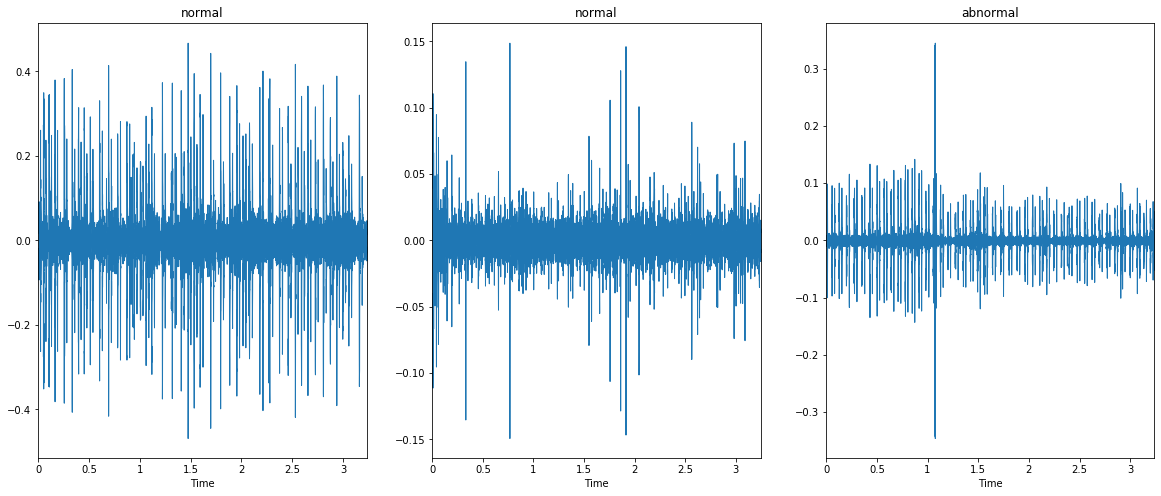

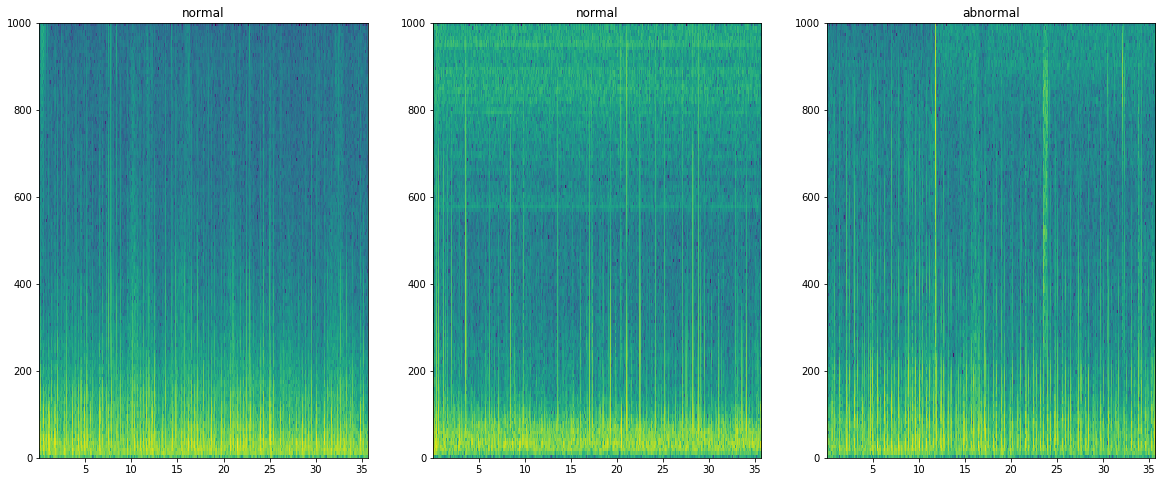

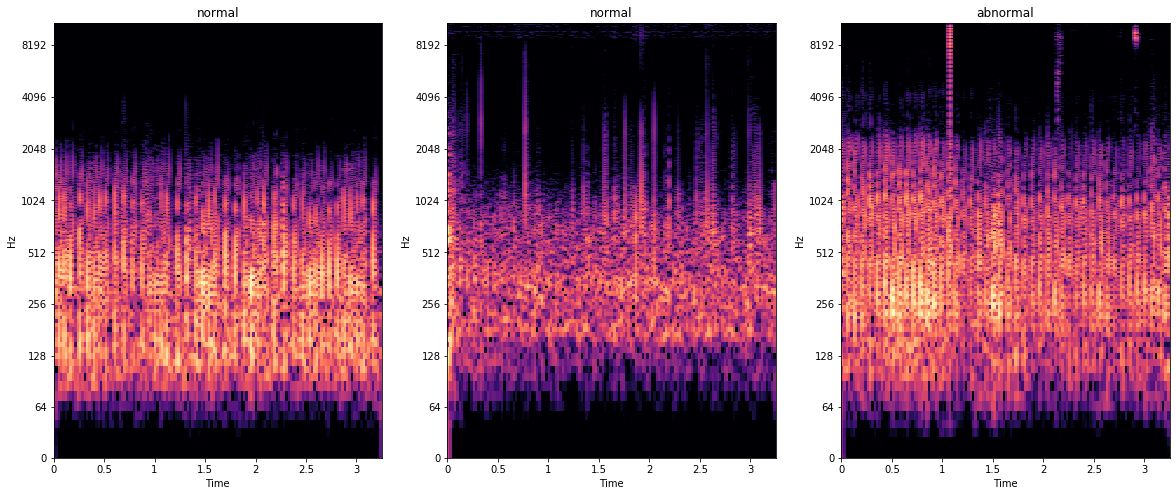

In [3]:
files = [r"data\physionet\training-a\a0007.wav", 
         r"data\physionet\training-a\a0009.wav", 
         r"data\physionet\training-a\a0010.wav"]
labels = ['normal', 'normal', 'abnormal']

waves = load_files(files, 2000)
plot_waves(waves, labels)
plot_specgram(waves, labels)
plot_log_power_specgram(waves, labels)

The training data coming from the PhysioNet 2016 Cardiology Challenge consists of five databases (A through E) containing a total of 3,126 heart sound recordings. Each database is represented as a folder containing all the audio belonging to that database and also there is a CSV file that indicates which of those audios are normal or abnormal. The following cells will create a dataframe for each CSV present in the five databases and then concatenate them to a sigle dataframe. The CSV files do not come with a header so one will be placed. It is also important to mention that the target variable has a value of `-1` for normal heartbeats and a value of `1` for abnormal heartbeats.

In [4]:
df_a = pd.read_csv('data/physionet/training-a/REFERENCE.csv', names = ['file', 'target'])
df_b = pd.read_csv('data/physionet/training-b/REFERENCE.csv', names = ['file', 'target'])
df_c = pd.read_csv('data/physionet/training-c/REFERENCE.csv', names = ['file', 'target'])
df_d = pd.read_csv('data/physionet/training-d/REFERENCE.csv', names = ['file', 'target'])
df_e = pd.read_csv('data/physionet/training-e/REFERENCE.csv', names = ['file', 'target'])

In [5]:
df_physionet = pd.concat([df_a, df_b, df_c, df_d, df_e], ignore_index=True)

In [6]:
df_physionet['target'] = df_physionet['target'].apply(lambda x: 'normal' if x == -1 else 'abnormal')

In [7]:
df_physionet_label_counts = df_physionet['target'].value_counts()

In [8]:
df_physionet_label_counts

normal      2495
abnormal     631
Name: target, dtype: int64

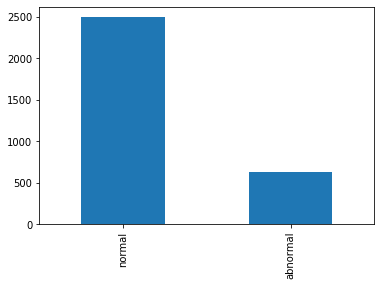

In [9]:
df_physionet_label_counts.plot.bar()
plt.show()

A similar approach will be taken to explore the Kaggle dataset. This dataset contains recordings from healthy subjects and patients with different kinds of heart conditions: normal, artifact, murmur and extra heartbeat. There is a total of 176 audio files out of which only 124 files are labeled so we will remove the ones that do not have a label. Also the column with the name 'sublabel' is empty so it will be also dropped from the dataset.

In [10]:
df_kaggle = pd.read_csv(r'C:\Users\DEVARSHI\Desktop\heartbeats-master\heartbeats-master\data\kaggle\set_a.csv')

In [11]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [12]:
df_kaggle.drop(['sublabel'], axis=1, inplace=True)

In [13]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
dataset    176 non-null object
fname      176 non-null object
label      124 non-null object
dtypes: object(3)
memory usage: 4.2+ KB


In [14]:
df_kaggle.dropna(inplace=True)

In [15]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 3 columns):
dataset    124 non-null object
fname      124 non-null object
label      124 non-null object
dtypes: object(3)
memory usage: 3.9+ KB


In [16]:
df_kaggle_label_counts = df_kaggle['label'].value_counts()

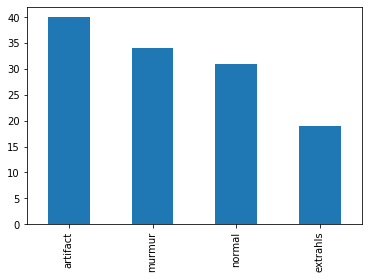

In [17]:
df_kaggle_label_counts.plot.bar()
plt.show()